In [1]:
# Python bibliotekos
import numpy as np                  # "numpy" yra biblioteka darbui su didelėmis, daugiamatėmis masyvų ir matricų kolekcijomis bei matematinėmis funkcijomis
import pandas as pd                 # "pandas" suteikia struktūras duomenims ir įrankius jų analizei, pvz., DataFrame
import matplotlib.pyplot as plt     # "matplotlib.pyplot" yra vizualizacijos biblioteka, leidžianti piešti įvairius grafikus
import warnings                     # "warnings" leidžia valdyti įspėjimus: juos ignoruoti, spausdinti, ar klaidinti
import requests                     # "requests" leidžia siųsti HTTP užklausas naudojant Python
from datetime import datetime       # "datetime" modulis suteikia funkcijas darbui su data ir laiku
from bs4 import BeautifulSoup       # "BeautifulSoup" padeda atlikti internetinių puslapių šaltinio kodo (HTML, XML) analizę ir duomenų surinkimą
import time                         # "time" modulis suteikia funkcijas, susijusias su laiku, pvz., laiko gaišimą ar laiko matavimą
import sqlite3                      # "sqlite3" leidžia dirbti su SQLite duomenų bazėmis, atliekant duomenų saugojimo, atnaujinimo ir gavimo operacijas
from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warnings
warnings.filterwarnings('ignore')   # Nustato, kad visi įspėjimai būtų ignoruojami

# Set up Selenium webdriver options
from selenium import webdriver                          # "selenium.webdriver" leidžia automatizuoti veiksmus interneto naršyklėje
from selenium.webdriver.chrome.options import Options   # "Options" leidžia nustatyti konfigūracijas Chrome naršyklės draiveriui

In [16]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Papildomai importuojame: 
from sklearn.linear_model import LinearRegression  # Tiesinės regresijos modelis
from sklearn.model_selection import train_test_split  # Duomenų padalijimas į treniravimo ir testavimo rinkinius

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Duoti kodai 1

from sklearn.model_selection import train_test_split, cross_val_score
scores = cross_validate(model, X, y, cv=10, scoring=('r2', 'max_error'))
scores = cross_val_score(model, X, y, cv=10)

######################
#Kodas patikrinimui ka LabelEncoder uzkodavo
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(data)
print(“Category Mapping:”, dict(zip(data, encoded_data))).

In [108]:
# a) Parašyti kainos prognozės skriptą, kuris prognozuotų būsto kainą. Naudoti LinearRegression.
# Kategorines vertes užkoduoti su LabelEncoder'iu.

# Prisijungimas prie duomenų bazės ir duomenų nuskaitymas
db_path = "AruodasBaze4.db"
connection = sqlite3.connect(db_path)
query = """
SELECT * FROM Aruodas1;
"""
df_autoplius = pd.read_sql_query(query, connection)
connection.close()

# Lenteles nudropinimas nereikalingiems duomenims 
df_autoplius = df_autoplius.drop(columns=['energetine', 'id'])


#Stulpeliu encodinimas
encoder = LabelEncoder()
df_autoplius['miestas'] = encoder.fit_transform(df_autoplius['miestas'])
df_autoplius['sildymas'] = encoder.fit_transform(df_autoplius['sildymas'])
df_autoplius['tipas'] = encoder.fit_transform(df_autoplius['tipas'])
df_autoplius['rajonas'] = encoder.fit_transform(df_autoplius['rajonas'])

df_autoplius.head()

X = df_autoplius[['miestas', 'plotas', 'metai','sildymas', 'aukstai', 'aukstas','rajonas', 'kambariai']]
y = df_autoplius['kaina']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42) 
fit = LinearRegression().fit(X_train, y_train)   #apmokinome fit masyva
predicted = fit.predict(X_test); predicted  

spejimai = pd.Series(data=predicted, name = 'Spejimai'); spejimai   #susidedame i Series objekta 
orig_rez = pd.Series(data=y_test, name='YTest')                     #susidedame i Series objekta 

res = pd.concat([orig_rez.reset_index(drop=True), spejimai], axis = 1); res.head()  #sujungiame spejimus ir fakta i viena lentele 


,YTest,Spejimai
0,67900,65410.153217
1,120000,128595.395165
2,65000,163879.526383
3,73000,156100.109387
4,120000,94454.388467


60.019330947576165


<Axes: >

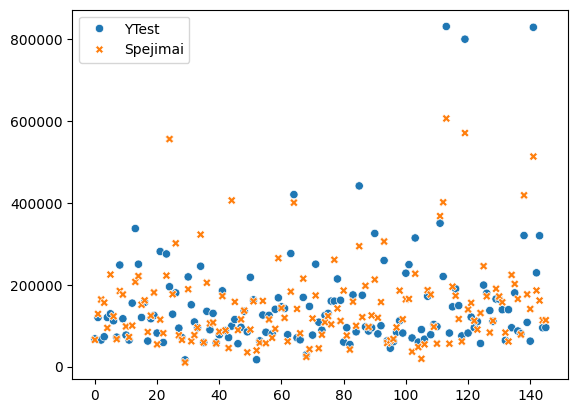

In [109]:
print(fit.score(X_test, y_test)*100.0)
sns.scatterplot(data=res)

In [48]:
# Kategoriju tikrinimas (paskutinio encodinimo)
mapping = dict(enumerate(encoder.classes_))
print("Miestų kodavimas:", mapping)

Miestų kodavimas: {0: 'A. Mickevičiaus g.', 1: 'Aido tak.', 2: 'Ajerų g.', 3: 'Alantos mstl.', 4: 'Aleksote', 5: 'Alksnynėje', 6: 'Amaliuose', 7: 'Antakalnyje', 8: 'Aukštuosiuose Šančiuose', 9: 'Aukštutiniuose Kaniūkuose', 10: 'Austėjos g.', 11: 'Bajoruose', 12: 'Balsiuose', 13: 'Baltijos mikrorajone', 14: 'Baltupiuose', 15: 'Bandužiuose', 16: 'Bangų g.', 17: 'Bendrovių g.', 18: 'Brukšvos g.', 19: 'Buivydiškėse', 20: 'Burbiškėse', 21: 'Centre', 22: 'Dainavoje', 23: 'Debrecene', 24: 'Druskininkų g.', 25: 'Dzūkų g.', 26: 'Eiguliuose', 27: 'Fabijoniškėse', 28: 'Fredoje', 29: 'Ganyklų g.', 30: 'Genio g.', 31: 'Giedraičių mstl.', 32: 'Giruliuose', 33: 'Graužinių g.', 34: 'Grigiškėse', 35: 'Gričiupyje', 36: 'Hipodromo g.', 37: 'J. Biliūno g.', 38: 'J. Janonio g.', 39: 'J. Simpsono g.', 40: 'J. Šliūpo g.', 41: 'Jeruzalėje', 42: 'Justiniškėse', 43: 'Jūratės g.', 44: 'Kalniečiuose', 45: 'Kalnėnuose', 46: 'Karklų g.', 47: 'Karoliniškėse', 48: 'Kastyčio g.', 49: 'Kauno mikrorajone', 50: 'Kretingo

In [51]:
#Kategoriju tikrinimas (kiekvienai kategorijai)

label_encoder = LabelEncoder()
data = df_autoplius['miestas']
encoded_data = label_encoder.fit_transform(data)
[print('Category Mapping:', dict(zip(data,encoded_data)))]

Category Mapping: {4: np.int64(4), 3: np.int64(3), 0: np.int64(0), 1: np.int64(1), 2: np.int64(2)}


[None]

,miestas,plotas,metai,sildymas,kaina,tipas,aukstai,aukstas,rajonas,kambariai
0,4,19,1957,1,46500,5,4,3,75,1
1,4,47,1973,1,97900,0,9,5,47,2
2,4,250,1919,1,1649999,5,6,3,101,7
3,3,71,2023,1,249800,4,4,4,119,3
4,3,50,2024,4,149900,5,2,2,30,3
...,...,...,...,...,...,...,...,...,...,...
1455,3,40,2018,3,210000,5,3,1,61,2
1456,0,33,1980,1,72500,0,5,5,26,1
1457,1,32,1987,1,64990,5,5,2,70,1
1458,3,48,2019,2,219000,5,2,2,96,2


In [112]:
# b) Iš autoplius duomenų pasirinkti 7-8 parametrus ir parašyti skriptą automobilio vertės nustatymui.
# Įvertinkite tikslumą su score parametru.


# Prisijungimas prie duomenu bazes 
db_path = "AutopliusDuombaze10.db"
connection = sqlite3.connect(db_path)
query = """
SELECT * FROM Autoplius;
"""
df_autoplius = pd.read_sql_query(query, connection)
connection.close()

# Sutvarkome DataFrame
df_autoplius = df_autoplius.drop(columns=['defektai', 'ta_galiojimas', 'miestas','salis','pavadinimas'])
df_autoplius = df_autoplius[df_autoplius['kaina'] != 0]
df_autoplius = df_autoplius[df_autoplius['amzius'] != 'Nėra']
df_autoplius = df_autoplius[df_autoplius['galia'] != 0]

#Stulpeliu encodinimas
encoder = LabelEncoder()
df_autoplius['keb_tipas'] = encoder.fit_transform(df_autoplius['keb_tipas'])
df_autoplius['pavaru_deze'] = encoder.fit_transform(df_autoplius['pavaru_deze'])
df_autoplius['kuras'] = encoder.fit_transform(df_autoplius['kuras'])
df_autoplius['gamintojas'] = encoder.fit_transform(df_autoplius['gamintojas'])
df_autoplius

# Modelio apmokymas
X = df_autoplius[['rida','amzius','galia','pavaru_deze','keb_tipas','kuras','gamintojas']]    # 
y = df_autoplius['kaina']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=42) 
fit = LinearRegression().fit(X_train, y_train)   #apmokinome fit masyva
predicted = fit.predict(X_test); predicted  

spejimai = pd.Series(data=predicted, name = 'Spejimai'); spejimai   #susidedame i Series objekta 
orig_rez = pd.Series(data=y_test, name='YTest')                     #susidedame i Series objekta 

res = pd.concat([orig_rez.reset_index(drop=True), spejimai], axis = 1); res.head()  #sujungiame spejimus ir fakta i viena lentele 



,YTest,Spejimai
0,15000,19435.434964
1,30900,16441.632783
2,3600,4446.825198
3,2600,7009.409576
4,3590,-419.576520


In [ ]:
a = int(input('Įveskite cilindrų skaičių (3-8): '))
b = float(input('Įveskite displacement '))
c = int(input('Įveskite horsepower'))
d = int(input('Įveskite weight'))
e = int(input('Įveskite acceleration'))
f = int(input('Įveskite model_year'))

pag_salis = input('Įveskite europe/japan/usa: ').strip().lower()
g, h, i = 0, 0, 0  
if pag_salis == 'europe':
    g = 1
elif pag_salis == 'japan':
    h = 1
elif pag_salis == 'usa':
    i = 1
else:
    print("Neteisingai")
input_data = np.array([[a, b, c, d, e, f, g, h, i]])  # Sukuriame masyvą
prediction = fit.predict(input_data)  # Prognozė

In [114]:
df_autoplius

,id,kaina,rida,amzius,galia,keb_tipas,pavaru_deze,kuras,gamintojas
0,1,16900,53500,2018,1197,11,0,0,24
1,2,18000,199000,2015,1997,6,0,0,2
2,3,21900,0,2018,400,11,2,6,13
3,4,5650,259000,2004,4500,11,0,0,27
4,5,10500,126211,2016,2360,11,0,1,8
...,...,...,...,...,...,...,...,...,...
618,619,4000,350000,2009,2200,9,0,4,21
619,620,4000,253997,2007,2000,9,1,4,1
620,621,4050,96719,2011,3604,1,0,0,4
621,622,4100,174000,2012,998,0,1,0,9


60.1132009612592


<Axes: >

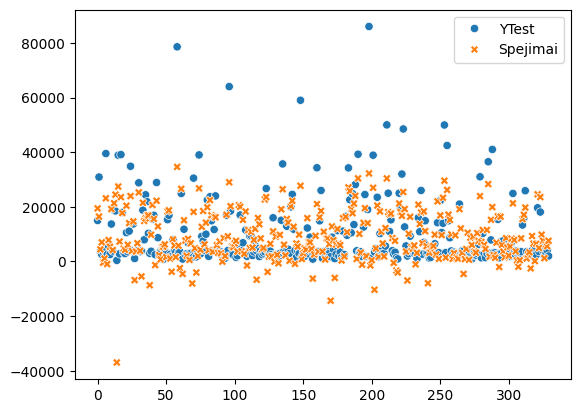

In [113]:
print(fit.score(X_test, y_test)*100.0)
sns.scatterplot(data=res)

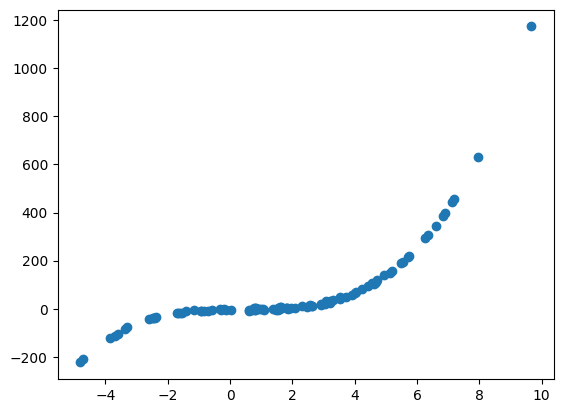

In [ ]:
# NAUJAU MEDZIAGA: Polinomine regresija 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Atsitiktiniu skaiciu generavimas
np.random.seed(0)
x = 2-3*np.random.normal(0,1,100)
y = x-2*(x**2)+1.5*(x**3)+np.random.normal(-3,3,100)
x = x[:, np.newaxis]

plt.scatter(x,y)
plt.show()

In [128]:
# Polinomine regresija 2

polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

# Modelio kurimas 
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r = model.score(x_poly,y)
print('rmse', rmse, 'r2', r, sep='\t')

rmse	3.072743608208423	r2	0.9996788340617946


In [135]:
# Logistine regresija 

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# split the train and test dataset
X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.20,
random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 96.49122807017544


<Axes: >

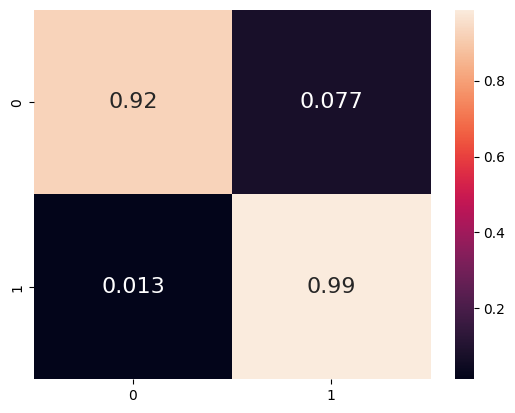

In [140]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})

In [165]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("taweilo/loan-approval-classification-data") # Download latest version
df = pd.read_csv(path+"/loan_data.csv")  # print("Path to dataset files:", path)

#Pasiruosiame duomenis 
X = df.drop(columns=['loan_status','person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']) #prediktoriai
y = df['loan_status']  #tikslas 

#Paskirstome duomenis modelio testavimui:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelio treniravimas 
model = LogisticRegression()
model.fit(X_train, y_train)

#Atliekami predictions naudojantis istreniruotu modeliu 
y_pred = model.predict(X_test)

# Modelio įvertinimas
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)



81.5111111111111


In [ ]:
df['loan_status'] = encoder.fit_transform(df['loan_status'])


In [166]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("taweilo/loan-approval-classification-data") # Download latest version
df = pd.read_csv(path+"/loan_data.csv")  # print("Path to dataset files:", path)


# Duomenu kodavimas 
encoder = LabelEncoder()
df['loan_status'] = encoder.fit_transform(df['loan_status'])
df['person_gender'] = encoder.fit_transform(df['person_gender'])
df['person_education'] = encoder.fit_transform(df['person_education'])
df['person_home_ownership'] = encoder.fit_transform(df['person_home_ownership'])
df['loan_intent'] = encoder.fit_transform(df['loan_intent'])
df['previous_loan_defaults_on_file'] = encoder.fit_transform(df['previous_loan_defaults_on_file'])

#Pasiruosiame duomenis 
X = df.drop(columns=['loan_status'])    #prediktoriai
y = df['loan_status']                   #tikslas 

#Paskirstome duomenis modelio testavimui:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelio treniravimas 
model = LogisticRegression()
model.fit(X_train, y_train)

#Atliekami predictions naudojantis istreniruotu modeliu 
y_pred = model.predict(X_test)

# Modelio įvertinimas
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)


82.73333333333333


<Axes: >

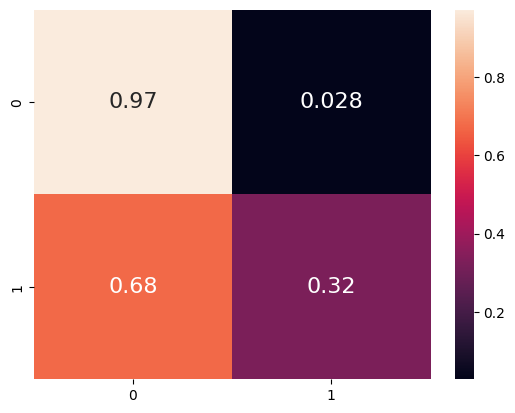

In [167]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})